# Support Vector Machine

In [1]:
# file path exist
import os.path
from os import path

# translator
import googletrans
from googletrans import Translator

# pandas
import pandas as pd

# preprocessing of text
import re
import string


# word tokenizer by nltk
from nltk import word_tokenize

# lemmatizer
from nltk.stem import WordNetLemmatizer

# stopwords (Remove buzz words)
from nltk.corpus import stopwords

# split data into train and test
from sklearn.model_selection import train_test_split

# bag of words
from sklearn.feature_extraction.text import CountVectorizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

# RFM classifier from scikit learn
from sklearn.svm import LinearSVC

# Tf-idf feature extraction 
from sklearn.feature_extraction.text import TfidfVectorizer

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# cross validation for kfold
from sklearn.model_selection import cross_val_score

# calc accuracy
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [2]:

# original hindi file
filename  = 'Eng-Hin-data/hindi-anot-shuffled'
orig_df = pd.read_csv(filename + '.csv',  
               delimiter=',')
orig_df.columns = ['Text', 'Label']

In [3]:
orig_df.head()

,Text,Label
0,'गाजा में दीवाली की ढेरो बधाई मित्रो 😊💐 #Is...,0
1,'@SanjayGadhiaINC @IndiaToday18 अज़ाबे इलाही 👍,1
2,'आखिर अब #सुशांत_सिंह_राजपूत जी को न्याय मिल ज...,0
3,'अमीन के 500 से अधिक छात्रों ने सर्वे भवन के ग...,0
4,'@deoriapolice @Uppolice @myogiadityanath @spg...,0


In [4]:
# Displaying eg tweet before translation
orig_df.Text[6]

"'आज के दिन ही मेरा क्रिकेट प्रेम भी समाप्त हो गया"

In [5]:
# For non English data translated file

if not path.exists(filename + '-translated.csv'):
    p_data = pd.read_csv("Eng-Hin-data/hindi-anot-shuffled.csv")
    #data =  data.drop('Strength',1)
    translator = Translator()
    col_one_list = p_data['Text'].tolist()
    len(col_one_list)
    result = []
    for i  in range(len(col_one_list)):
        try:
            trans = translator.translate(col_one_list[i], dest='en')
            result.append(trans.text)
        except:
                result.append(col_one_list[i])
    p_data['Text'] = result
    p_data.to_csv(filename + '-translated.csv', index=False)
    df = pd.read_csv(filename + '-translated.csv',  
                   delimiter=',')
    df.columns = ['Text', 'Label']
    df.head(15)
    df["Text"] = df["Text"].astype(str)
    df["Label"] = df["Label"].astype(str)
    data = df
    print("Not Exist")
else:
    print("Exist")
    df = pd.read_csv(filename + '-translated.csv',  
                   delimiter=',')
    df.columns = ['Text', 'Label']
    df.head(15)
    df["Text"] = df["Text"].astype(str)
    df["Label"] = df["Label"].astype(str)
    data = df

Exist


In [6]:
data.Text[6]

"'Today also my cricket love has ended"

### Class count

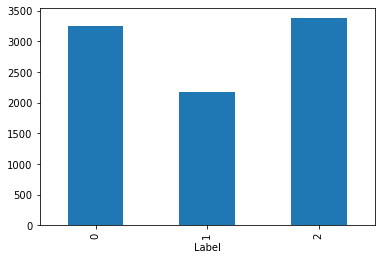

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
df.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [8]:
# For entire dataset sentences for each labels 
df.Label.value_counts()

2    3374
0    3246
1    2173
Name: Label, dtype: int64

In [9]:
#balancing data 
from collections import Counter
import numpy as np
def balanceClasses(xs, ys):
    item = {}
    new_ys = []
    new_xs = []
    #"""Undersample xs, ys to balance classes."""
    freqs = Counter(ys)
    # the most common class  is the maximum number we want for all classes
    max_allowable = (freqs.most_common()[0][1])
    
    for val in freqs.most_common(): # List
        nums = np.random.randint(1000)
        i = 1
        item[val[0]] = max_allowable - val[1]
        
        if item[val[0]] > 0:            
            while(item[val[0]] - i != 0): 
                nums = nums + 1
                if ys[nums] == val[0]:
                    i += 1
                    new_ys.append(ys[nums])
                    new_xs.append(xs[nums])
    return new_xs, new_ys

In [10]:
new_text, new_label = balanceClasses(df['Text'], df['Label'])

In [11]:
data = pd.DataFrame(new_text)
data.columns = ['Text']
data['Label'] = new_label
data = pd.concat([df, data])

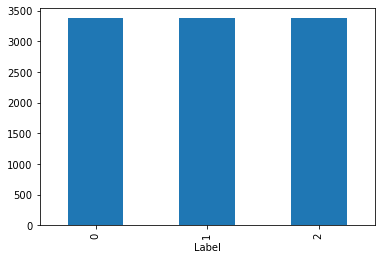

In [12]:
fig1 = plt.figure(figsize=(6,4))
data.groupby('Label').Text.count().plot.bar(ylim=0)
plt.show()

In [13]:
data.Label.value_counts()

2    3374
0    3373
1    3373
Name: Label, dtype: int64

In [14]:
data=data.sample(frac=1).reset_index(drop=True)
data

,Text,Label
0,'I stand with @SalmanNizami_ Israel ... 😂 Diwa...,0
1,'@GulzebAhmed Speaking on Jihadi Manuwad 😂😂😂😂,2
2,'@ShifatTayba Happy Islamic New Year to you too,1
3,'Ola Hu Ober Lahore Via Kuwait Amen,1
4,💞💞💞 The brotherhood was alive. And will be.,0
...,...,...
10115,'@DrSunilKhatik Jihadi mentality has always be...,2
10116,'We 53714775 Amen Bhai Jaan,1
10117,This time you will win with 50 thousand votes ...,0
10118,'@pinkichaubey @ anjali620484 What do blind de...,0


### Data Preprocessing

In [15]:
# People usually join sentences using more than one colon 

def ReplaceDoubleColon(inputString):
    return inputString.replace("..", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceDoubleColon(x))

def ReplaceTripleColon(inputString):
    return inputString.replace("...", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceTripleColon(x))

def ReplaceFourColon(inputString):
    return inputString.replace("....", " ") 

data['Text'] = data['Text'].apply(lambda x: ReplaceFourColon(x))

In [16]:
def textPattern(text):

    # Clean the text
    text = re.sub(r"@", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"aren't", "are not", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"didn't", "did not", text)
    text = re.sub(r"doesn't", "does not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"hadn't", "had not", text)
    text = re.sub(r"hasn't", "has not", text)
    text = re.sub(r"haven't", "have not", text)
    text = re.sub(r"isn't", "is not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"wasn't", "was not", text)
    text = re.sub(r"weren't", "were not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"wouldn't", "would not", text)
    text = re.sub(r"mustn't", "must not", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"\'re", "are", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\= =", " ", text)
    text = re.sub(r"\==", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"\s{2,}", " ", text)
    return text

data['Text'] = data['Text'].apply(lambda x: textPattern(x))

In [17]:
# Word Tokenization
tokens = [word_tokenize(sen) for sen in data.Text]

In [18]:
# Lower Case
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [19]:
# Remove Link

def removeLink(token):
    word = []
    for w in token:
        if not w.startswith('http'):
            word.append(w)
    return word 
    
removedLink_tokens = [removeLink(token) for token in lower_tokens]

In [20]:
# Word Lemmatization
def lemmatization(token):
    return [lemmatizer.lemmatize(w) for w in token] 

lemmatizer = WordNetLemmatizer()

lemmatized_tokens = [lemmatization(token) for token in removedLink_tokens]

In [21]:
# Removing Stopwords
stoplist = stopwords.words('english')

In [22]:
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]

filtered_words = [sen for sen in lemmatized_tokens]
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

In [23]:
zero  = []
one = []
two = []
for l in data.Label:
    
    if l == '0':
        zero.append(1)
        one.append(0)
        two.append(0)
    elif l == '1':
        zero.append(0)
        one.append(1)
        two.append(0)
    elif l == '2':
        zero.append(0)
        one.append(0)
        two.append(1)
        
data['0']= zero
data['1']= one
data['2']= two

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2']]

In [24]:
category_id = []
for l in data.Label:
    
    if l == '0':
        category_id.append('0')
    elif l == '1':
        category_id.append('1')
    elif l == '2':
        category_id.append('2')
        
data['Category_id'] = category_id

data = data[['Text_Final', 'tokens', 'Label', '0', '1', '2', 'Category_id' ]]
data.head(25)

,Text_Final,tokens,Label,0,1,2,Category_id
0,i stand with salmannizami_ israel 😂 diwali sho...,"[i, stand, with, salmannizami_, israel, 😂, diw...",0,1,0,0,0
1,gulzebahmed speaking on jihadi manuwad 😂😂😂😂,"[gulzebahmed, speaking, on, jihadi, manuwad, 😂...",2,0,0,1,2
2,shifattayba happy islamic new year to you too,"[shifattayba, happy, islamic, new, year, to, y...",1,0,1,0,1
3,ola hu ober lahore via kuwait amen,"[ola, hu, ober, lahore, via, kuwait, amen]",1,0,1,0,1
4,💞💞💞 the brotherhood wa alive and will be,"[💞💞💞, the, brotherhood, wa, alive, and, will, be]",0,1,0,0,0
5,stonedphantom43 shefvaidya 56perumal petaindia...,"[stonedphantom43, shefvaidya, 56perumal, petai...",2,0,0,1,2
6,pakistan murdabad balochistan zindabad # shahe...,"[pakistan, murdabad, balochistan, zindabad, #,...",0,1,0,0,0
7,anantvijay reduced to a jihadi,"[anantvijay, reduced, to, a, jihadi]",2,0,0,1,2
8,shabinabano_ shakilk 05283285 mashaallah,"[shabinabano_, shakilk, 05283285, mashaallah]",1,0,1,0,1
9,ajitanjoom kahe s regret is the crusader,"[ajitanjoom, kahe, s, regret, is, the, crusader]",2,0,0,1,2


In [56]:
data = data[data.tokens != '']

In [52]:
data.shape

(10120, 7)

In [53]:
data.to_csv('yz.csv', index=False)

In [26]:
from io import StringIO
category_id_df = data[['Label', 'Category_id']].drop_duplicates().sort_values('Category_id')
category_to_label_dict = dict(category_id_df.values)
label_to_category_dict = dict(category_id_df[['Category_id', 'Label']].values)

#### Split Data into test and train
We will use 90 % data for training and 10 % for testing. We use random state so every time we get the same training and testing data.

# Support Vector Method (SVM) and Random Forest Method (RFM)

We referred a blog on Multi class classification for SVM and RFM [2]

### Generating features using TF-IDF Vectorizer method

In [27]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 5), stop_words='english')
features = vectorizer.fit_transform(data.Text_Final).toarray()
labels = data.Label
features.shape

(10120, 35788)

### Testing SVM models using K-fold cross validation


In [28]:
import random

# Creating model 
model = LinearSVC(random_state=0, tol=1e-5, verbose=1, max_iter=10000)

# KFold cross-validation
kFold = 10

scores = []
#To get accuracy of the model for 10 different splits
scoreValue = cross_val_score(model, features, labels, scoring='accuracy', cv= kFold)

# append name and score of each model with different splits
print("Support Vector with Tf-idf: ")
for fold_idx, accuracy in enumerate(scoreValue):
    print ((fold_idx + 1), accuracy)
    scores.append(accuracy)
    
Mean_score =  sum(scores) / len(scores)
print(f" Average Accuracy : {Mean_score}" )


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Support Vector with Tf-idf: 
1 0.9614624505928854
2 0.9476284584980237
3 0.9525691699604744
4 0.9545454545454546
5 0.9436758893280632
6 0.9594861660079052
7 0.9535573122529645
8 0.9664031620553359
9 0.9654150197628458
10 0.9515810276679841
 Average Accuracy : 0.9556324110671938


### Spliting data 90/ 10

In [29]:
# Using similar split as CNN model
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(features, labels, data.index, test_size=0.10, random_state=82)

### SVM - Generating model 

In [30]:
# generate Linear SVM model
model = LinearSVC()
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### SVM - Showing some prediction

In [31]:
# 0
print(clf.predict(vectorizer.transform(["These media fellows have time to dissect one's social media profile,but none of spineless jokers has the guts to question as to why and how a convict like Lalu Yadav is roaming outside and running a Government."])))

['0']


In [32]:
# 2
print(clf.predict(vectorizer.transform(["Muslim asshole jehadi!"])))

['2']


In [33]:
# 1
print(clf.predict(vectorizer.transform(["I have a muslim friend and Islam is beautiful"])))

['1']


In [34]:
# 2
print(clf.predict(vectorizer.transform(["@Peer__Pressure_ @Totla_musa It's a religion of rape. Momo started it and it still continues to this day. Haven't you heard the saying what the right hand possess It's is from Pisslam "])))

['2']


In [35]:
#1
print(clf.predict(vectorizer.transform(["'@hiavol6 happy first day of muharram bub ily"])))

['1']


###  SVM - Displaying false-positive rate (FPR) and true positive rate (TPR)

                          Support Vector Method


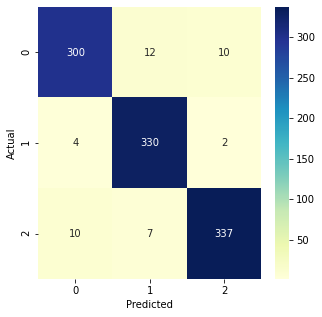

In [36]:
from sklearn.metrics import confusion_matrix
print("                          Support Vector Method")
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap ='YlGnBu',
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### SVM - Precision, Recall and F1-Score to quantify the quality of our model using a confusion matrix

In [37]:
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[300  12  10]
 [  4 330   2]
 [ 10   7 337]]
Accuracy Score : 0.9555335968379447
Report : 
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       322
           1       0.95      0.98      0.96       336
           2       0.97      0.95      0.96       354

    accuracy                           0.96      1012
   macro avg       0.96      0.96      0.96      1012
weighted avg       0.96      0.96      0.96      1012



# SVM - BOW

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
features1 = count_vect.fit_transform(data.Text_Final).toarray()
labels = data.Label
features1.shape

(10120, 15113)

In [39]:
# Using similar split 90/10
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(features1, labels, data.index, test_size=0.10, random_state=72)

In [40]:
# generate Linear SVM model
#model2 = LinearSVC()
model2 = LinearSVC(random_state=0, tol=1e-5, verbose=1, max_iter=10000)
clf2 = model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

[LibLinear]

### SVM - BOW - Showing some prediction

In [41]:
# 0
print(clf2.predict(count_vect.transform(["Cambs U18 v Under 18 Under 18 138/9 (37.4) Cambridgeshire Cricket Board Under 18 won by 111 runs"])))

['0']


In [42]:
# 2
print(clf2.predict(count_vect.transform(["Muslim asshole jehadi !"])))

['2']


In [43]:
# 1
print(clf2.predict(count_vect.transform(["I have a muslim friend and Islam is beautiful"])))

['1']


In [44]:
# 1
print(clf2.predict(count_vect.transform(["Prophet said: Whenever a Muslim supplicates for his (Muslim) brother in his absence  the angels say: `May the same be for you too"])))

['1']


###  SVM - BOW - Displaying false-positive rate (FPR) and true positive rate (TPR)

                     Support Vector Method - BOW


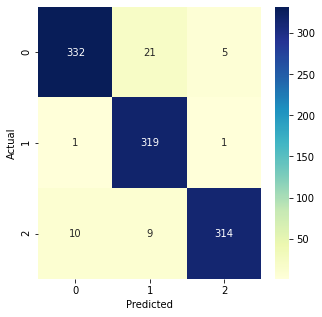

In [45]:
from sklearn.metrics import confusion_matrix
print("                     Support Vector Method - BOW")
conf_mat = confusion_matrix(y_test, y_pred2)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### SVM - BOW - Precision, Recall and F1-Score to quantify the quality of our model using a confusion matrix.

In [46]:
results2 = confusion_matrix(y_test, y_pred2)
print ('Confusion Matrix :')
print(results2) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred2))
print ('Report : ')
print (classification_report(y_test, y_pred2))

Confusion Matrix :
[[332  21   5]
 [  1 319   1]
 [ 10   9 314]]
Accuracy Score : 0.9535573122529645
Report : 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       358
           1       0.91      0.99      0.95       321
           2       0.98      0.94      0.96       333

    accuracy                           0.95      1012
   macro avg       0.95      0.95      0.95      1012
weighted avg       0.96      0.95      0.95      1012



### SVM with BOW kfold

In [47]:
# KFold cross-validation
kFold = 10

scores = []
#To get accuracy of the model for 10 different splits
scoreValue = cross_val_score(model2, features1, labels, scoring='accuracy', cv= kFold)

# append name and score of each model with different splits
print("Random Forest with BOW: ")
for fold_idx, accuracy in enumerate(scoreValue):
    print ((fold_idx + 1), accuracy)
    scores.append(accuracy)
    
Mean_score =  sum(scores) / len(scores)
print(f" Average Accuracy : {Mean_score}" )

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Random Forest with BOW: 
1 0.9525691699604744
2 0.9387351778656127
3 0.9367588932806324
4 0.9318181818181818
5 0.9397233201581028
6 0.9476284584980237
7 0.9436758893280632
8 0.958498023715415
9 0.9575098814229249
10 0.9377470355731226
 Average Accuracy : 0.9444664031620554


### Reference

[1] Multi-Class Text Classification with Scikit-Learn by Susan Li

[2] Scikit-Learn Documentation https://scikit-learn.org/